#Proyecto final: Modelos de hielo usando el short/long loop

Luis Arturo \\ Jorge Ramírez

In [4]:
using PyPlot

In [5]:
function Config(L)
    if mod(L,2)!=0
        L+=1
    end
    config=ones(L,L)
    return config
end

Config (generic function with 1 method)

In [6]:
function Initialize(i,j,config,red_bool)
    L=length(config[1,:])
    #se escoje la dirección del inicial 
    config[i,j]=2*round(rand())-1
    #se marca la zona de retorno
    if mod(i,2)==mod(j,2)
        red_bool[mod1(i+config[i,j],L),mod1(j+config[i,j],L)]=false
        red_bool[mod1(i+config[i,j],L),j]=false
        red_bool[i,mod1(j+config[i,j],L)]=false
    else
        red_bool[mod1(i+config[i,j],L),mod1(j-config[i,j],L)]=false
        red_bool[mod1(i+config[i,j],L),j]=false
        red_bool[i,mod1(j-config[i,j],L)]=false
    end
    return config, red_bool
end

Initialize (generic function with 1 method)

In [7]:
function Step(i,j,config)
    L=length(config[1,:])
    #se escoge el paso a dar en i y j
    r=rand()
    i_step=ceil(1-3*(r)/2)
    j_step=ceil(3*(r)/2-1/2)
    if config[i,j]>0
        if mod(i,2)==mod(j,2)
            i_new=mod1(i-i_step,L)
            j_new=mod1(j-j_step,L)
        else
            i_new=mod1(i-i_step,L)
            j_new=mod1(j+j_step,L)
        end
    else
        if mod(i,2)==mod(j,2)
            i_new=mod1(i+i_step,L)
            j_new=mod1(j+j_step,L)
        else
            i_new=mod1(i+i_step,L)
            j_new=mod1(j-j_step,L)
        end
    end
    #se cambia la dirección de la nueva flecha si es necesario
    if i_step==0 
        config[i_new,j_new]=-config[i,j]
    else
        config[i_new,j_new]=config[i,j]
    end
    return i_new,j_new, config
end

Step (generic function with 1 method)

In [8]:
function Long_loop(config)
    #El modelo que implemento sólo es compatible con redes "pares" por las condiciones periódicas
    L=length(config[1,:])
    red_bool=trues(L,L)
    #escojo la celda inicial
    i=rand(1:L)
    j=rand(1:L)
    i_array=[i]
    j_array=[j]
    #Se escoge la dirección del inicial
    config,red_bool=Initialize(i,j,config,red_bool)
    #Se inicia la creación del loop
    t=1
    t_limit=L*L
    while t < t_limit
        #calculo el nuevo paso
        i_new,j_new,config=Step(i_array[t],j_array[t],config)
        push!(i_array,i_new)
        push!(j_array,j_new)
        #si ya se llegó a la zona de retorno, se termina el loop
        if red_bool[i_new,j_new]==false
            t=t_limit
        end
        t+=1
    end
    return config
end

Long_loop (generic function with 1 method)

elapsed time: 0.424361124 seconds (155 MB allocated, 13.24% gc time in 8 pauses with 0 full sweep)


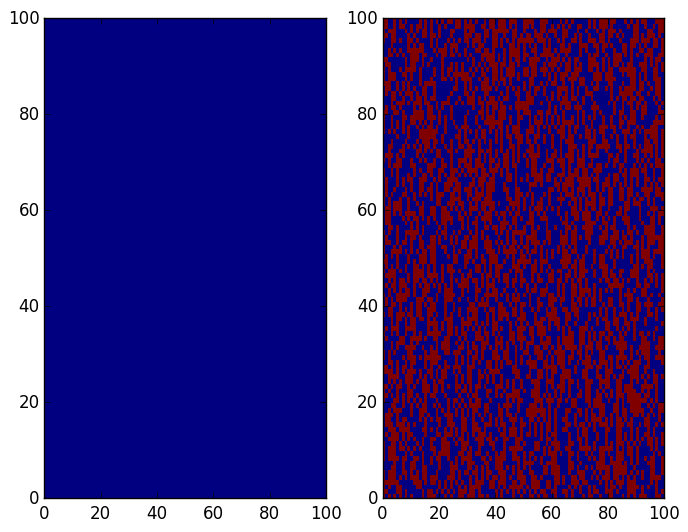

PyObject <matplotlib.collections.QuadMesh object at 0x3126a4a50>

In [9]:
original=Config(100)
new=copy(original)
@time for t in 1:60
    meanwhile=Long_loop(new)
    new=meanwhile
end
figure(figsize=[8,6])
subplot(1,2,1)
#figure(figsize=[3,3])
pcolormesh(original)

subplot(1,2,2)
pcolormesh(new)


In [10]:
function Step_short(i,j,config,red_bool)
    L=length(config[1,:])
    #se escoge el paso a dar en i y j
    r=rand()
    i_step=ceil(1-3*(r)/2)
    j_step=ceil(3*(r)/2-1/2)
    if config[i,j]>0
        if mod(i,2)==mod(j,2)
            i_new=mod1(i-i_step,L)
            j_new=mod1(j-j_step,L)
        else
            i_new=mod1(i-i_step,L)
            j_new=mod1(j+j_step,L)
        end
    else
        if mod(i,2)==mod(j,2)
            i_new=mod1(i+i_step,L)
            j_new=mod1(j+j_step,L)
        else
            i_new=mod1(i+i_step,L)
            j_new=mod1(j-j_step,L)
        end
    end
    #se cambia la dirección de la nueva flecha si es necesario
    if i_step==0 
        config[i_new,j_new]=-config[i,j]
    else
        config[i_new,j_new]=config[i,j]
    end
    #se marcan las zonas de posibles retornos
    if mod(i_new,2)==mod(j_new,2)
        red_bool[mod1(i+config[i_new,j_new],L),mod1(j+config[i_new,j_new],L)]=false
        red_bool[mod1(i+config[i_new,j_new],L),j]=false
        red_bool[i,mod1(j+config[i_new,j_new],L)]=false
    else
        red_bool[mod1(i+config[i_new,j_new],L),mod1(j-config[i_new,j_new],L)]=false
        red_bool[mod1(i+config[i_new,j_new],L),j]=false
        red_bool[i,mod1(j-config[i_new,j_new],L)]=false
    end
    
    return i_new,j_new, config, red_bool
end

Step_short (generic function with 1 method)

In [15]:
function Reverse(i_array,j_array,config)
    t_last=length(i_array)
    L=length(config)
    a=[0,0,0]
    b=[0,0,0]
    #marco las coordenadas de las posibles celdas que pertenezcan al camino
    if mod(i_array[t_last],2)==mod(j_array[t_last],2)
        a[1]=mod1(i_array[t_last]+config[i_array[t_last],j_array[t_last]],L)
        b[1]=mod1(j_array[t_last]+config[i_array[t_last],j_array[t_last]],L)
        a[2]=mod1(i_array[t_last]+config[i_array[t_last],j_array[t_last]],L)
        b[2]=j_array[t_last]
        a[3]=i_array[t_last]
        b[3]=mod1(j_array[t_last]+config[i_array[t_last],j_array[t_last]],L)
    else
        a[1]=mod1(i_array[t_last]+config[i_array[t_last],j_array[t_last]],L)
        b[1]=mod1(j_array[t_last]-config[i_array[t_last],j_array[t_last]],L)
        a[2]=mod1(i_array[t_last]+config[i_array[t_last],j_array[t_last]],L)
        b[2]=j_array[t_last]
        a[3]=i_array[t_last]
        b[3]=mod1(j_array[t_last]-config[i_array[t_last],j_array[t_last]],L)
    end
    counter=0
    t_min=t_last
    #encuentro las celdas que corresponden y de ahí revierto lo hecho
    for i in 1:t_last-1
        if counter<2
            for s in 1:3
                if i_array[t_last-i]==a[s] && j_array[t_last-i]==b[s]
                    counter+=1
                    t_min=t_last-i
                    println(t_min)
                end
            end
        else
            config[i_array[t_last-i],j_array[t_last-i]]*=-1
        end
    end
    return config
end

Reverse (generic function with 1 method)

In [16]:
function Short_loop(config)
    #El modelo que implemento sólo es compatible con redes "pares" por las condiciones periódicas
    L=length(config[1,:])
    red_bool=trues(L,L)
    #escojo la celda inicial
    i=rand(1:L)
    j=rand(1:L)
    i_array=[i]
    j_array=[j]
    #Se escoge la dirección del inicial
    config,red_bool=Initialize(i,j,config,red_bool)
    #Se inicia la creación del loop
    t=1
    t_limit=L*L
    t_last=0
    while t < t_limit
        #calculo el nuevo paso
        i_new,j_new,config,red_bool=Step_short(i_array[t],j_array[t],config,red_bool)
        push!(i_array,i_new)
        push!(j_array,j_new)
        #si ya se llegó a la zona de retorno, se termina el loop
        if red_bool[i_new,j_new]==false
            t_last=t+1
            t=t_limit
        end
        t+=1
    end
    @show i_array, j_array
    config=Reverse(i_array,j_array,config)
    return config,red_bool
end

Short_loop (generic function with 1 method)

In [26]:
original=Config(8)
original,huy=Short_loop(original)

(i_array,j_array) = ([3,3,2,1,8,8,1,2],[1,2,3,3,3,4,4,3])
7
4


(
8x8 Array{Float64,2}:
 1.0   1.0  1.0  -1.0  1.0  1.0  1.0  1.0
 1.0   1.0  1.0   1.0  1.0  1.0  1.0  1.0
 1.0  -1.0  1.0   1.0  1.0  1.0  1.0  1.0
 1.0   1.0  1.0   1.0  1.0  1.0  1.0  1.0
 1.0   1.0  1.0   1.0  1.0  1.0  1.0  1.0
 1.0   1.0  1.0   1.0  1.0  1.0  1.0  1.0
 1.0   1.0  1.0   1.0  1.0  1.0  1.0  1.0
 1.0   1.0  1.0  -1.0  1.0  1.0  1.0  1.0,

8x8 BitArray{2}:
  true  false   true   true  false  true  true   true
 false  false  false  false   true  true  true  false
 false   true  false  false   true  true  true  false
 false  false   true   true   true  true  true  false
  true   true   true   true   true  true  true   true
  true   true   true   true   true  true  true   true
  true  false  false  false  false  true  true   true
  true  false   true  false  false  true  true   true)